# Problem Statement

How effective is Cook Political's PVI score in conjunction with Congressional district voting trends for predicting potential U.S. general election outcomes?

**Goals and Objectives**

1)  Measure predictive accuracy within each general election year starting with 2000 using historical dataset features

2)  Apply merged predictive results from each general election year to determine whether 2016 results could be predicted with reasonable accuracy

3)  Should 2016 results have been reasonably well predicted with PVI score and voting results, use information to predict possible voting results for the 2020 general election

**Success Metrics**

1) Accuracy score of 2016 general election results based on historical merged predictive results from previous general election year datasets

2) Estimated score error for 2016 general election results

3) Should 2016 Accuracy score prove 75% or higher, a prediction dataset should be produced for 2020 results and include accuracy score and score error

**Risks and Assumptions**

1) Insufficient features within historical datasets for building predictive models

2) Population shifts over time and geography may organically impact congressional district size and results

3) Gerrymandering may artificially impact congressional district size and results

4) Accuracy scores may be too low for applying to 2016 and 2020 predictions

**Proposed Methods and Models**

1) Train-test-split for each dataset

2) Perform linear regression and classification for each dataset

3) Use preprocessors and boosters to yield more effective features, i.e. binarizer preprocessor for pvi_prefix

4) Visualizations whenever possible for improved dataset and trend examination

# EDA

In [335]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [301]:
df = pd.read_csv('PVI Data.csv')
df.shape

(435, 8)

In [302]:
df.head()

,dist,member,party,pvi,d16,r16,clinton,trump
0,Alabama-01,Bradley Byrne,R,R+15,0.00%,96.40%,33.80%,63.00%
1,Alabama-02,Martha Roby,R,R+16,40.50%,48.80%,32.80%,64.50%
2,Alabama-03,Mike Rogers,R,R+16,32.90%,66.90%,31.90%,64.80%
3,Alabama-04,Robert Aderholt,R,R+30,0.00%,98.50%,17.30%,79.80%
4,Alabama-05,Mo Brooks,R,R+18,33.20%,66.70%,30.90%,63.70%


In [303]:
df.dtypes

dist       object
member     object
party      object
pvi        object
d16        object
r16        object
clinton    object
trump      object
dtype: object

In [304]:
df['d16'] = pd.to_numeric(df['d16'].str.replace('%', ''))
df['r16'] = pd.to_numeric(df['r16'].str.replace('%', ''))
df['clinton'] = pd.to_numeric(df['clinton'].str.replace('%', ''))
df['trump'] = pd.to_numeric(df['trump'].str.replace('%', ''))

In [305]:
df.head()

,dist,member,party,pvi,d16,r16,clinton,trump
0,Alabama-01,Bradley Byrne,R,R+15,0.0,96.4,33.8,63.0
1,Alabama-02,Martha Roby,R,R+16,40.5,48.8,32.8,64.5
2,Alabama-03,Mike Rogers,R,R+16,32.9,66.9,31.9,64.8
3,Alabama-04,Robert Aderholt,R,R+30,0.0,98.5,17.3,79.8
4,Alabama-05,Mo Brooks,R,R+18,33.2,66.7,30.9,63.7


In [306]:
df.dtypes

dist        object
member      object
party       object
pvi         object
d16        float64
r16        float64
clinton    float64
trump      float64
dtype: object

In [307]:
df['pvi'] = df['pvi'].astype(str)

In [308]:
df.dtypes

dist        object
member      object
party       object
pvi         object
d16        float64
r16        float64
clinton    float64
trump      float64
dtype: object

In [309]:
df['pvi_prefix'] = df['pvi'].apply(lambda x: x.split('+')[0])
df['pvi_score'] = df['pvi'].apply(lambda x: x.split('+')[-1])

In [310]:
df.dtypes

dist           object
member         object
party          object
pvi            object
d16           float64
r16           float64
clinton       float64
trump         float64
pvi_prefix     object
pvi_score      object
dtype: object

In [311]:
df['pvi_score']

0        15
1        16
2        16
3        30
4        18
5        26
6        20
7         9
8         2
9         1
10       13
11       21
12       15
13        9
14       23
15       13
16        4
17       17
18        7
19       19
20       17
21       11
22       22
23        5
24       10
25       21
26       21
27        3
28        9
29        8
       ... 
405      10
406       6
407      13
408       6
409      21
410      19
411       1
412      15
413       6
414      10
415       4
416      13
417       8
418       6
419      33
420    EVEN
421      21
422       5
423      19
424      17
425      23
426       5
427      18
428    EVEN
429      25
430      13
431       8
432       8
433       7
434      25
Name: pvi_score, Length: 435, dtype: object

In [312]:
df['pvi_score'].replace(to_replace=dict(EVEN=1), inplace=True)

In [313]:
df['pvi_score']

0      15
1      16
2      16
3      30
4      18
5      26
6      20
7       9
8       2
9       1
10     13
11     21
12     15
13      9
14     23
15     13
16      4
17     17
18      7
19     19
20     17
21     11
22     22
23      5
24     10
25     21
26     21
27      3
28      9
29      8
       ..
405    10
406     6
407    13
408     6
409    21
410    19
411     1
412    15
413     6
414    10
415     4
416    13
417     8
418     6
419    33
420     1
421    21
422     5
423    19
424    17
425    23
426     5
427    18
428     1
429    25
430    13
431     8
432     8
433     7
434    25
Name: pvi_score, Length: 435, dtype: object

In [314]:
df['pvi_score'] = df['pvi_score'].astype(int)

In [315]:
df.head()

,dist,member,party,pvi,d16,r16,clinton,trump,pvi_prefix,pvi_score
0,Alabama-01,Bradley Byrne,R,R+15,0.0,96.4,33.8,63.0,R,15
1,Alabama-02,Martha Roby,R,R+16,40.5,48.8,32.8,64.5,R,16
2,Alabama-03,Mike Rogers,R,R+16,32.9,66.9,31.9,64.8,R,16
3,Alabama-04,Robert Aderholt,R,R+30,0.0,98.5,17.3,79.8,R,30
4,Alabama-05,Mo Brooks,R,R+18,33.2,66.7,30.9,63.7,R,18


In [316]:
df.dtypes

dist           object
member         object
party          object
pvi            object
d16           float64
r16           float64
clinton       float64
trump         float64
pvi_prefix     object
pvi_score       int32
dtype: object

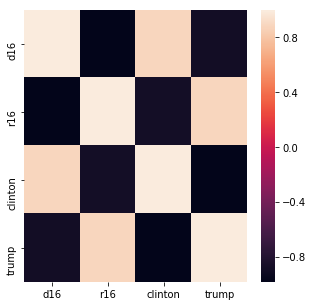

In [352]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(df[['d16', 'r16', 'clinton', 'trump']].corr())

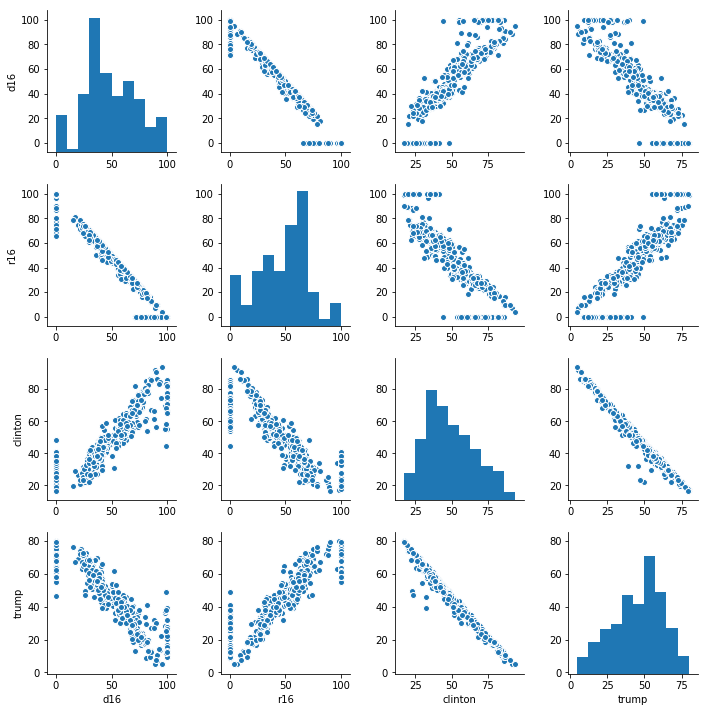

In [354]:
sns.pairplot(df[['d16', 'r16', 'clinton', 'trump']])

In [318]:
df9800 = pd.read_csv('Cook Historical PVI 98-00.csv')
df9800.shape

(435, 3)

In [319]:
df02 = pd.read_csv('Cook Historical PVI 02.csv')
df02.shape

(435, 3)

In [320]:
df04 = pd.read_csv('Cook Historical PVI 04.csv')
df04.shape

(435, 3)

In [321]:
df0608 = pd.read_csv('Cook Historical PVI 06-08.csv')
df0608.shape

(435, 8)

In [322]:
df0608.dtypes

State          object
District        int64
PVI            object
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
Unnamed: 6    float64
Unnamed: 7    float64
dtype: object

In [323]:
df0608 = df0608[['State', 'District', 'PVI']]
df0608.shape

(435, 3)

In [324]:
df10 = pd.read_csv('Cook Historical PVI 10.csv')
df10.shape

(435, 6)

In [325]:
df10.dtypes

State          object
District        int64
PVI            object
Unnamed: 3    float64
Unnamed: 4    float64
Unnamed: 5    float64
dtype: object

In [326]:
df10 = df10[['State', 'District', 'PVI']]
df10.shape

(435, 3)

In [327]:
df12 = pd.read_csv('Cook Historical PVI 12.csv')
df12.shape

(435, 3)

In [328]:
df14 = pd.read_csv('Cook Historical PVI 14.csv')
df14.shape

(435, 3)

**Process Summary**

1) Collect additional features for historical datasets

2) Determine whether I have enough features and data values to perform a strong, valid prediction in a train-test-split

3) Run EDA on all historical datasets when sufficient features have been collected

4) Run predictive models, including using preprocessing and boosting for model optimization, on 2016 and historical datasets

5) Merge historical predictors to produce a final predictive model for 2016 general election dataset

6) Predict 2020 general election results if 2016 predictors are above 75% accuracy

### ### END